# Assignment 2

### Folkert Stijnman - 10475206
### Introduction to Computational Science


![](problem1.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def gillespie(X, Y, N, beta, gamma):
    Transmission = beta * X * Y / N
    Recovery = gamma * Y
    R_total = Transmission + Recovery
    
    rand_1 = np.random.rand()
    rand_2 = np.random.rand()
    
    delta_t = - np.log(rand_1) / R_total
    if rand_2 < (Transmission / R_total):
        Y += 1
    else:
        Y -= 1
    return Y, delta_t

def discrete_event(X, Y, N, beta, gamma, tot_time):
    Y_data = [Y]
    x = [0]
    while x[-1] < tot_time and Y_data[-1] > 0:
        X = N - Y
        Y, t = gillespie(X, Y_data[-1], N, beta, gamma)

        Y_data.append(Y)
        x.append(x[-1] + t)
        
    return Y_data, x

beta = 0.03
gamma = 1 / 100.0
Y = 70.0
N = 100.0
X = N - Y

Y_data, x = discrete_event(X, Y, N, beta, gamma, 100*365)

plt.plot(np.array(x)/365, Y_data)
plt.title("Gillespie w/o demography")
plt.xlabel("Time (years)")
plt.ylabel("Number of Infected (I)")
plt.savefig("simple_gillespie_wo_demo.png", dpi=300)
plt.show()

<Figure size 640x480 with 1 Axes>

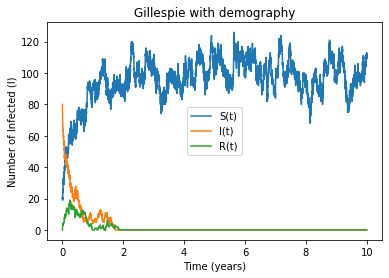

3.02 95.6318532557195


In [2]:
import numpy as np
import matplotlib.pyplot as plt


def gillespie_demography(pop, beta, gamma, mu):
    X, Y, Z = pop
    Birth = mu * N
    Death_X = mu * X
    Death_Y = mu * Y
    Death_Z = mu * Z
    Transmission = beta * X * Y / N
    Recovery = gamma * Y
    
    events = [[1, 0, 0], [-1, 0, 0], [0, -1, 0], [0, 0, -1], [-1, 1, 0], [0, -1, 1]]
    
    event_rates = [Birth, Death_X, Death_Y, Death_Z, Transmission, Recovery]
    R_total = np.sum(event_rates)
    
    rand_vec = np.random.rand(1, 6)
    
    with np.errstate(divide='ignore'):
        event_rates_t = np.divide(-np.log(rand_vec), event_rates)
    
    delta_t = np.min(event_rates_t)
    
    pop = np.array([X, Y, Z])
    pop += events[np.argmin(event_rates_t)]
    
    return list(pop), delta_t

def discrete_event_demography(pop, beta, gamma, mu, tot_time):
    pop_data = [pop]
    time = [0]
    while time[-1] < tot_time:
        pop, delta_t = gillespie_demography(pop, beta, gamma, mu)

        pop_data.append(pop)
        time.append(time[-1] + delta_t)
        
    return pop_data, time

beta = 0.03
gamma = 1 / 100.0
mu = 0.02
R_0 = beta / gamma + mu

Y = 80.0
X = 20.0
Z = 0
pop = [X, Y, Z]

# gillespie_demography(pop, beta, gamma, mu)

pop_data, x = discrete_event_demography(pop, beta, gamma, mu, 10*365)

pop_data = np.array(pop_data)

plt.plot(np.array(x)/365, pop_data[:,0], label="S(t)")
plt.plot(np.array(x)/365, pop_data[:,1], label="I(t)")
plt.plot(np.array(x)/365, pop_data[:,2], label="R(t)")
plt.title("Gillespie with demography")
plt.xlabel("Time (years)")
plt.ylabel("Number of Infected (I)")
plt.legend()
plt.show()
print(R_0, np.mean(pop_data[:,0]))

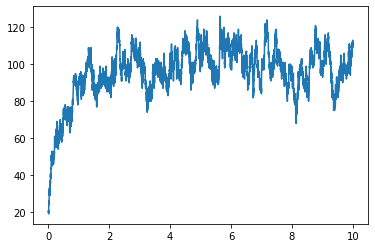

In [3]:
plt.plot(np.array(x)/365, pop_data[:,0])
plt.show()

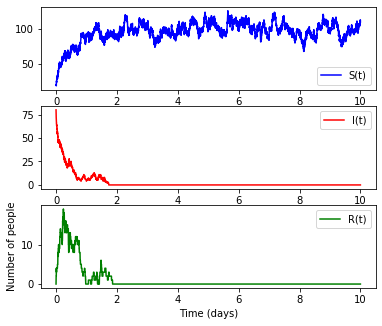

In [4]:
plt.subplots_adjust(top = 1.1)
plt.subplot(311)
plt.plot(np.array(x)/365, pop_data[:,0], label="S(t)", color='b')
plt.legend()
plt.subplot(312)
plt.plot(np.array(x)/365, pop_data[:,1], label="I(t)", color='r')
plt.legend()
plt.subplot(313)
plt.plot(np.array(x)/365, pop_data[:,2], label="R(t)", color='g')
plt.legend()
plt.xlabel("Time (days)")
plt.ylabel("Number of people")
plt.show()

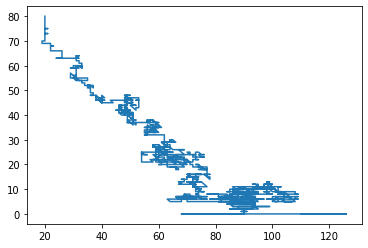

[[ 218.53331414 -104.13850702]
 [-104.13850702   82.50942854]]


In [5]:
plt.plot(pop_data[:,0], pop_data[:,1])
plt.show()

print(np.cov(pop_data[:,0], pop_data[:,1]))

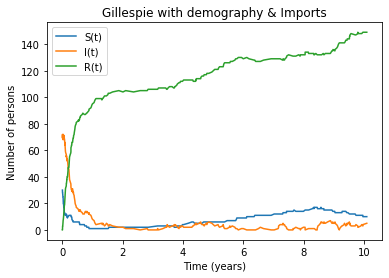

3.0 10.05151515151515


In [6]:
import numpy as np
import matplotlib.pyplot as plt


def gillespie_demography_import(pop, beta, gamma, mu, delta, epsilon):
    X, Y, Z = pop
    N = sum(pop)
    Birth = mu * N
    Death_X = mu * X
    Death_Y = mu * Y
    Death_Z = mu * Z
    Transmission = beta * X * Y / N
    Recovery = gamma * Y
    Infected_Import = delta * N
    Ext_Source = epsilon * X
    
    events = [[1, 0, 0], [-1, 0, 0], [0, -1, 0], [0, 0, -1], [-1, 1, 0], [0, -1, 1], [0, 1, 0], [-1, 1, 0]]
    
    event_rates = [Birth, Death_X, Death_Y, Death_Z, Transmission, Recovery, Infected_Import, Ext_Source]
    R_total = np.sum(event_rates)
    
    rand_vec = np.random.rand(1, len(event_rates))
    
    with np.errstate(divide='ignore'):
        event_rates_t = np.divide(-np.log(rand_vec), event_rates)
    
    delta_t = np.min(event_rates_t)
    
    pop = np.array([X, Y, Z])
    pop += events[np.argmin(event_rates_t)]
    
    return list(pop), delta_t

def discrete_event_demography_import(pop, beta, gamma, mu, delta, epsilon, tot_time):
    pop_data = [pop]
    time = [0]
    while time[-1] < tot_time:
        pop, delta_t = gillespie_demography_import(pop, beta, gamma, mu, delta, epsilon)

        pop_data.append(pop)
        time.append(time[-1] + delta_t)
        
    return pop_data, time

Y = 70.0
N = 100.0
X = N - Y
Z = 0

beta = 0.03
gamma = 1 / 100.0
mu = 0.02/365
R_0 = beta / gamma
delta = 0.05/365
epsilon = delta * R_0 / N

pop = [X, Y, Z]

pop_data, x = discrete_event_demography_import(pop, beta, gamma, mu, delta, epsilon, 10*365)

pop_data = np.array(pop_data)

plt.plot(np.array(x)/365, pop_data[:,0], label="S(t)")
plt.plot(np.array(x)/365, pop_data[:,1], label="I(t)")
plt.plot(np.array(x)/365, pop_data[:,2], label="R(t)")
plt.title("Gillespie with demography & Imports")
plt.xlabel("Time (years)")
plt.ylabel("Number of persons")
plt.legend()
plt.show()
print(R_0, np.mean(pop_data[:,0]))

![](spatialmodels.png)

## Meta-population models

In [7]:
def meta_pop_model(pop_1, pop_2, beta_i, beta_j, gamma_i, gamma_j, rho_ij, rho_ji):
    X_i, Y_i, R_i = pop_1
    X_j, Y_j, R_j = pop_2
    N_i = sum(pop_1)
    N_j = sum(pop_2)
    
    total_pop_matrix = np.concatenate([np.array(pop_1), np.array(pop_2)], axis=0).reshape(2, 3)

    T_i = beta_i * ((1 * X_i / N_i) + (rho_ij * (X_j / N_i)))
    R_i = gamma_i * Y_i
    T_j = beta_j * ((1* X_j / N_j) + (rho_ji * (X_i / N_j)))
    R_j = gamma_j * Y_j
    
    events = [[-1, 1, 0, 0, 0, 0], [0, -1, 1, 0, 0, 0], [0, 0, 0, -1, 1, 0], [0, 0, 0, 0, -1, 1]]
    
    event_rates = [T_i, R_i, T_j, R_j]
    R_total = np.sum(event_rates)
    
    rand_vec = np.random.rand(1, 4)
    
    with np.errstate(divide='ignore'):
        event_rates_t = np.divide(-np.log(rand_vec), event_rates)
    
    delta_t = np.min(event_rates_t)
    total_pop_matrix += np.array(events[np.argmin(event_rates_t)]).reshape(2, 3)

    return list(total_pop_matrix[0]), list(total_pop_matrix[1]), delta_t

def discrete_event_meta_pop_model(pop_1, pop_2, beta_i, beta_j, gamma_i, gamma_j, rho_ij, rho_ji, tot_time):
    pop_1_data = [pop_1]
    pop_2_data = [pop_2]
    time = [0]

    while time[-1] < tot_time and pop_1_data[-1][0] >= 0 and pop_2_data[-1][0] >= 0:
        pop_1, pop_2, delta_t =  meta_pop_model(pop_1, pop_2, beta_i, beta_j, gamma_i, gamma_j, rho_ij, rho_ji)
        
        pop_1_data.append(pop_1)
        pop_2_data.append(pop_2)
        time.append(time[-1] + delta_t)
        
    return pop_1_data, pop_2_data, time

pop_1 = [100, 20, 0]
pop_2 = [100, 20, 0]

beta_1 = 0.03
gamma_1 = 1 / 100.0

beta_2 = 0.1
gamma_2 = 1 / 50.0

rho_12, rho_21 = 0.1, 0.1

tot_time = 10*365

pop_1_data, pop_2_data, time = discrete_event_meta_pop_model(pop_1, pop_2, beta_1, beta_2, gamma_1, gamma_2, rho_12, rho_21, tot_time)

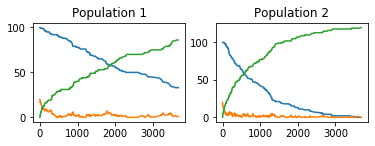

In [8]:
plt.figure()
plt.subplot(2, 2, 1)
plt.plot(time, pop_1_data)
plt.title("Population 1")
plt.subplot(2, 2, 2)
plt.plot(time, pop_2_data)
plt.title("Population 2")
plt.show()

## Lattice Models

In [60]:
class Population:
    def __init__(self, population, coordinates):
        self.S = population[0]
        self.I = population[1]
        self.R = population[2]
        self.total_pop = population
        
        self.coordinates = coordinates
        
        self.left = None
        self.right = None
        self.up = None
        self.down = None

    def find_neighbors(self):
        neighbors = []
        if self.left:
            neighbors.append(self.left)
        if self.right:
            neighbors.append(self.right)
        if self.up:
            neighbors.append(self.up)
        if self.down:
            neighbors.append(self.down)
        return neighbors
        
    def __repr__(self):
        return "{0}".format(self.I)
        
p1 = Population([80, 20, 0], (0, 0))
p2 = Population([100, 0, 0], (1, 0))

p1.right = p2

print(p1)

20


In [75]:
dimension = 5
middle = (int((dimension - 1) / 2), int((dimension - 1) / 2))

print(middle)

(2, 2)


In [145]:
class World:
    def __init__(self, dimension):
        """ Dimension can be an odd number between 0 - 20 """
        self.origin = None
        self.dimension = dimension
        
        middle = ((dimension - 1 / 2), (dimension - 1 / 2))
        for i in range(dimension):
            for j in range(dimension):

                if j == 0 and i == 0:
                    self.origin = Population((100, 0, 0), (i, j))
                    continue
                    
                if i == int((dimension - 1) / 2) and j == int((dimension - 1) / 2):
                    self.insert_middle_population((i, j))
                    continue
                    
                if j != 0 and i == 0:
                    self.create_world_y((i, j))
                    continue
                    
                if i != 0 and j == 0:
                    self.create_world_x((i, j))
                    continue
                    
                else:
                    print("initial coordinates", i, j)
                    node = self.create_world_regular((i, j))
                    print(node)
                    
    def find_node(self, coordinates):
        """Returns node given the coordinates"""
        node = self.origin
        y = 0
        while node.up and y < coordinates[1]:
            node = node.up
            y += 1
        x = 0
        while node.right and x < coordinates[0]:
            node = node.right
            x += 1
        if node.coordinates != coordinates:
            return None
        else:
            return node
                    
    def create_world_x(self, coordinates):
        node = self.origin
        for i in range(coordinates[0]):
            if node.right == None:
                node.right = Population((100, 0, 0), coordinates)
                node.right.left = node
                return node.right
            else:
                node = node.right
                
    def create_world_y(self, coordinates):
        node = self.origin
        for i in range(coordinates[1]):
            if node.up == None:
                node.up = Population((100, 0, 0), coordinates)
                node.up.down = node
                return node.up
            else:
                node = node.up
        
    def create_world_regular(self, coordinates):
        node = self.find_node((coordinates[0], coordinates[1] - 1))
        return node
        if node == None:
            return None

        node.up = Population((100, 0, 0), coordinates)
        node.up.down = node
        node_left = self.find_node((coordinates[0] - 1, coordinates[1]))
        node.right.down = node_down
        node_down.up = node.right
        
        return node.right
    
    def insert_middle_population(self, coordinates):
        node = self.find_node((coordinates[0] - 1, coordinates[1]))
        if node == None:
            return None
        
        node.right = Population((80, 20, 0), coordinates)
        node.right.left = node
        node_down = self.find_node((coordinates[0], coordinates[1] - 1))
        node.right.down = node_down
        node_down.up = node.right
        
        return node_right

      
    def __str__(self):
        grid_string = ""
        node = self.origin
        if node == None:
            return None
        grid_string += "### World ###\n"
        while node:
            node = node.up
            
        
        while node:
            temp = node
            while node:
                grid_string += "{0} ".format(node)
                node = node.right
            grid_string += "\n"
            node = temp.down
                    
        return grid_string

        
world_1 = World(5)


initial coordinates 1 1
0
initial coordinates 1 2
None
initial coordinates 1 3
None
initial coordinates 1 4
None
initial coordinates 2 1
0
initial coordinates 2 3
None
initial coordinates 2 4
None
initial coordinates 3 1
0
initial coordinates 3 2
None
initial coordinates 3 3
None
initial coordinates 3 4
None
initial coordinates 4 1
0
initial coordinates 4 2
None
initial coordinates 4 3
None
initial coordinates 4 4
None
